In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
berlin_temp_data = pd.read_csv("/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_7/MIlestone-Project/Berlin_Tempelhof_data/temperature_Berlin_tempelhof.csv")

In [3]:
berlin_temp_data.head(5)

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


In [4]:
berlin_temp_data.describe()

,SOUID,DATE,TG,Q_TG
count,53507.000000,5.350700e+04,53507.000000,53507.000000
mean,119335.479844,1.948816e+07,57.209206,0.032818
std,8023.477558,4.229061e+05,613.255502,0.542349
min,111448.000000,1.876010e+07,-9999.000000,0.000000
25%,111448.000000,1.912082e+07,33.000000,0.000000
50%,111448.000000,1.949040e+07,94.000000,0.000000
75%,127488.000000,1.985111e+07,157.000000,0.000000
max,128124.000000,2.022063e+07,305.000000,9.000000


In [5]:
berlin_temp_data.isna().sum()

 SOUID      0
    DATE    0
   TG       0
 Q_TG       0
dtype: int64

In [6]:
berlin_temp_data.columns

Index([' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [7]:
berlin_temp_data.rename(columns = {' SOUID':'SOUID', '    DATE':'DATE', '   TG':'TG',' Q_TG':'Q_TG'}, inplace = True)

In [8]:
berlin_temp_data.columns

Index(['SOUID', 'DATE', 'TG', 'Q_TG'], dtype='object')

In [9]:
#berlin_temp_data.set_index(berlin_temp_data['SOUID'], inplace = True)

In [10]:
berlin_temp_data.loc[:,'Temperature(°C)'] = berlin_temp_data['TG']*0.1

In [11]:
berlin_temp_data

,SOUID,DATE,TG,Q_TG,Temperature(°C)
0,127488,18760101,22,0,2.2
1,127488,18760102,25,0,2.5
2,127488,18760103,3,0,0.3
3,127488,18760104,-58,0,-5.8
4,127488,18760105,-98,0,-9.8
...,...,...,...,...,...
53502,111448,20220626,263,0,26.3
53503,111448,20220627,281,0,28.1
53504,111448,20220628,214,0,21.4
53505,111448,20220629,214,0,21.4


In [12]:
# Remove outlier

berlin_temp_data = berlin_temp_data[berlin_temp_data['TG']!=-9999.000000]

In [13]:

berlin_temp_data.loc[:,'timestep'] = list(range(len(berlin_temp_data)))

/tmp/ipykernel_50184/3541218427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berlin_temp_data.loc[:,'timestep'] = list(range(len(berlin_temp_data)))


In [14]:
berlin_temp_data.nunique()

SOUID                  3
DATE               53312
TG                   472
Q_TG                   2
Temperature(°C)      472
timestep           53312
dtype: int64

In [15]:
berlin_temp_data.dtypes

SOUID                int64
DATE                 int64
TG                   int64
Q_TG                 int64
Temperature(°C)    float64
timestep             int64
dtype: object

In [16]:
berlin_temp_data

,SOUID,DATE,TG,Q_TG,Temperature(°C),timestep
0,127488,18760101,22,0,2.2,0
1,127488,18760102,25,0,2.5,1
2,127488,18760103,3,0,0.3,2
3,127488,18760104,-58,0,-5.8,3
4,127488,18760105,-98,0,-9.8,4
...,...,...,...,...,...,...
53502,111448,20220626,263,0,26.3,53307
53503,111448,20220627,281,0,28.1,53308
53504,111448,20220628,214,0,21.4,53309
53505,111448,20220629,214,0,21.4,53310


In [17]:
berlin_temp_data['DATE'] = pd.to_datetime(berlin_temp_data['DATE'], format='%Y%m%d')

/tmp/ipykernel_50184/1492142432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berlin_temp_data['DATE'] = pd.to_datetime(berlin_temp_data['DATE'], format='%Y%m%d')


In [18]:
berlin_temp_data.dtypes

SOUID                       int64
DATE               datetime64[ns]
TG                          int64
Q_TG                        int64
Temperature(°C)           float64
timestep                    int64
dtype: object

In [19]:
berlin_temp_data.head(10)

,SOUID,DATE,TG,Q_TG,Temperature(°C),timestep
0,127488,1876-01-01,22,0,2.2,0
1,127488,1876-01-02,25,0,2.5,1
2,127488,1876-01-03,3,0,0.3,2
3,127488,1876-01-04,-58,0,-5.8,3
4,127488,1876-01-05,-98,0,-9.8,4
5,127488,1876-01-06,-77,0,-7.7,5
6,127488,1876-01-07,-66,0,-6.6,6
7,127488,1876-01-08,-89,0,-8.9,7
8,127488,1876-01-09,-127,0,-12.7,8
9,127488,1876-01-10,-89,0,-8.9,9


In [20]:
temp_df = berlin_temp_data.copy()

In [21]:
len(temp_df)

53312

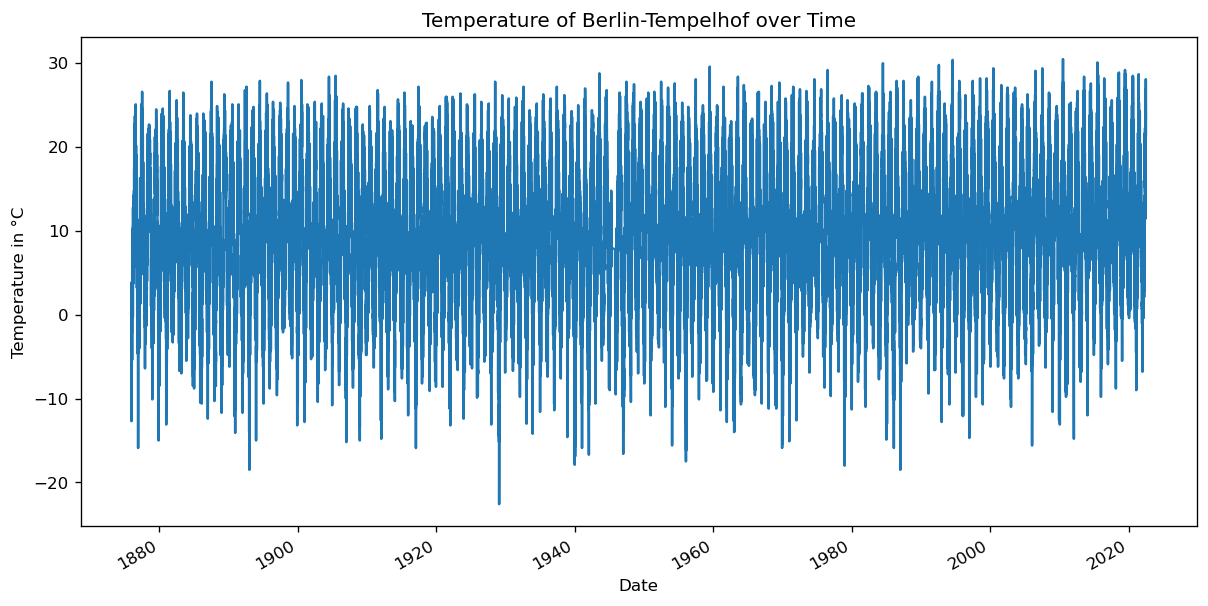

In [22]:
# plot
fig, ax = plt.subplots(figsize=(12,6))
berlin_temp_data.plot('DATE','Temperature(°C)',ax=ax)
ax.set(title = "Temperature of Berlin-Tempelhof over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature in °C")
ax.get_legend().remove()

In [23]:
berlin_temp_data = berlin_temp_data.set_index('DATE')

In [24]:
berlin_temp_data

,SOUID,TG,Q_TG,Temperature(°C),timestep
DATE,,,,,
1876-01-01,127488,22,0,2.2,0
1876-01-02,127488,25,0,2.5,1
1876-01-03,127488,3,0,0.3,2
1876-01-04,127488,-58,0,-5.8,3
1876-01-05,127488,-98,0,-9.8,4
...,...,...,...,...,...
2022-06-26,111448,263,0,26.3,53307
2022-06-27,111448,281,0,28.1,53308
2022-06-28,111448,214,0,21.4,53309


In [25]:
resample_year = berlin_temp_data.resample('Y').mean()
resample_year.reset_index(inplace = True)

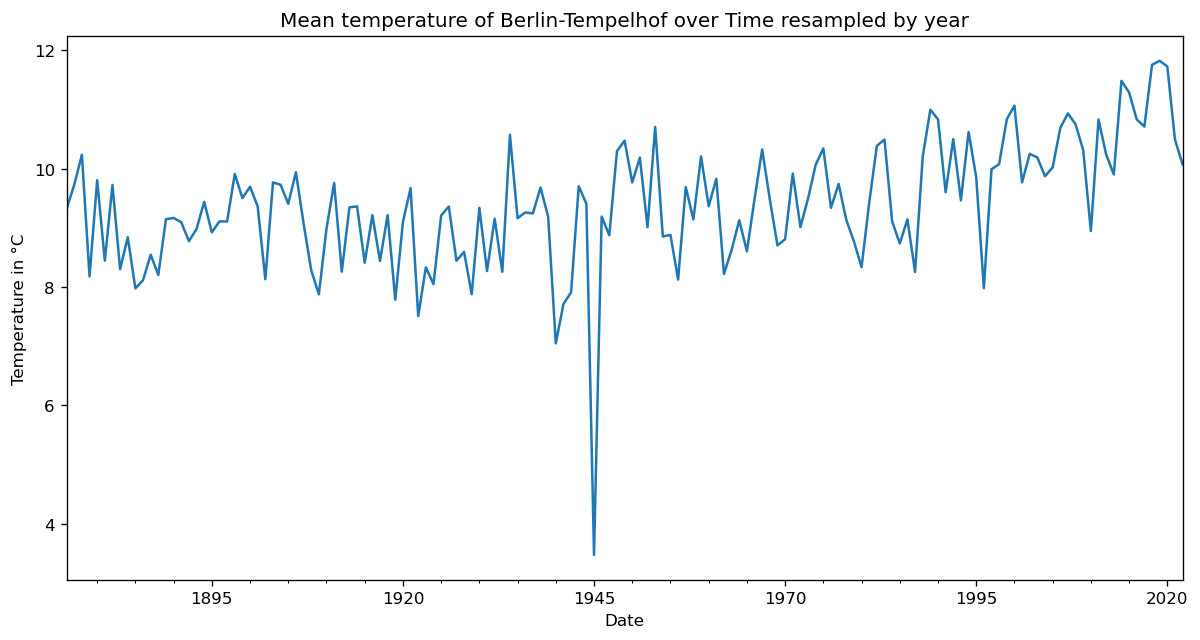

In [26]:
# plot
fig, ax = plt.subplots(figsize=(12,6))
resample_year.plot('DATE','Temperature(°C)',ax=ax)
ax.set(title = "Mean temperature of Berlin-Tempelhof over Time resampled by year")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature in °C")
ax.get_legend().remove()

In [27]:
resample_year

,DATE,SOUID,TG,Q_TG,Temperature(°C),timestep
0,1876-12-31,127488.0,93.202186,0.0,9.320219,182.5
1,1877-12-31,127488.0,97.279452,0.0,9.727945,548.0
2,1878-12-31,127488.0,102.367123,0.0,10.236712,913.0
3,1879-12-31,127488.0,81.805479,0.0,8.180548,1278.0
4,1880-12-31,127488.0,98.051913,0.0,9.805191,1643.5
...,...,...,...,...,...,...
142,2018-12-31,111448.0,117.556164,0.0,11.755616,51852.0
143,2019-12-31,111448.0,118.243836,0.0,11.824384,52217.0
144,2020-12-31,111448.0,117.284153,0.0,11.728415,52582.5
145,2021-12-31,111448.0,104.936986,0.0,10.493699,52948.0


In [28]:
resample_year = resample_year.set_index('DATE')
resample_year.index

DatetimeIndex(['1876-12-31', '1877-12-31', '1878-12-31', '1879-12-31',
               '1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31',
               ...
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31',
               '2021-12-31', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=147, freq=None)

In [29]:
resample_year_try = resample_year.groupby('DATE')['Temperature(°C)'].mean()

In [30]:
berlin_temp_data.head()

,SOUID,TG,Q_TG,Temperature(°C),timestep
DATE,,,,,
1876-01-01,127488,22,0,2.2,0
1876-01-02,127488,25,0,2.5,1
1876-01-03,127488,3,0,0.3,2
1876-01-04,127488,-58,0,-5.8,3
1876-01-05,127488,-98,0,-9.8,4


In [31]:
type(berlin_temp_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [32]:
y = resample_year['Temperature(°C)'].resample('M').mean()

In [33]:
y.dropna(inplace=True)

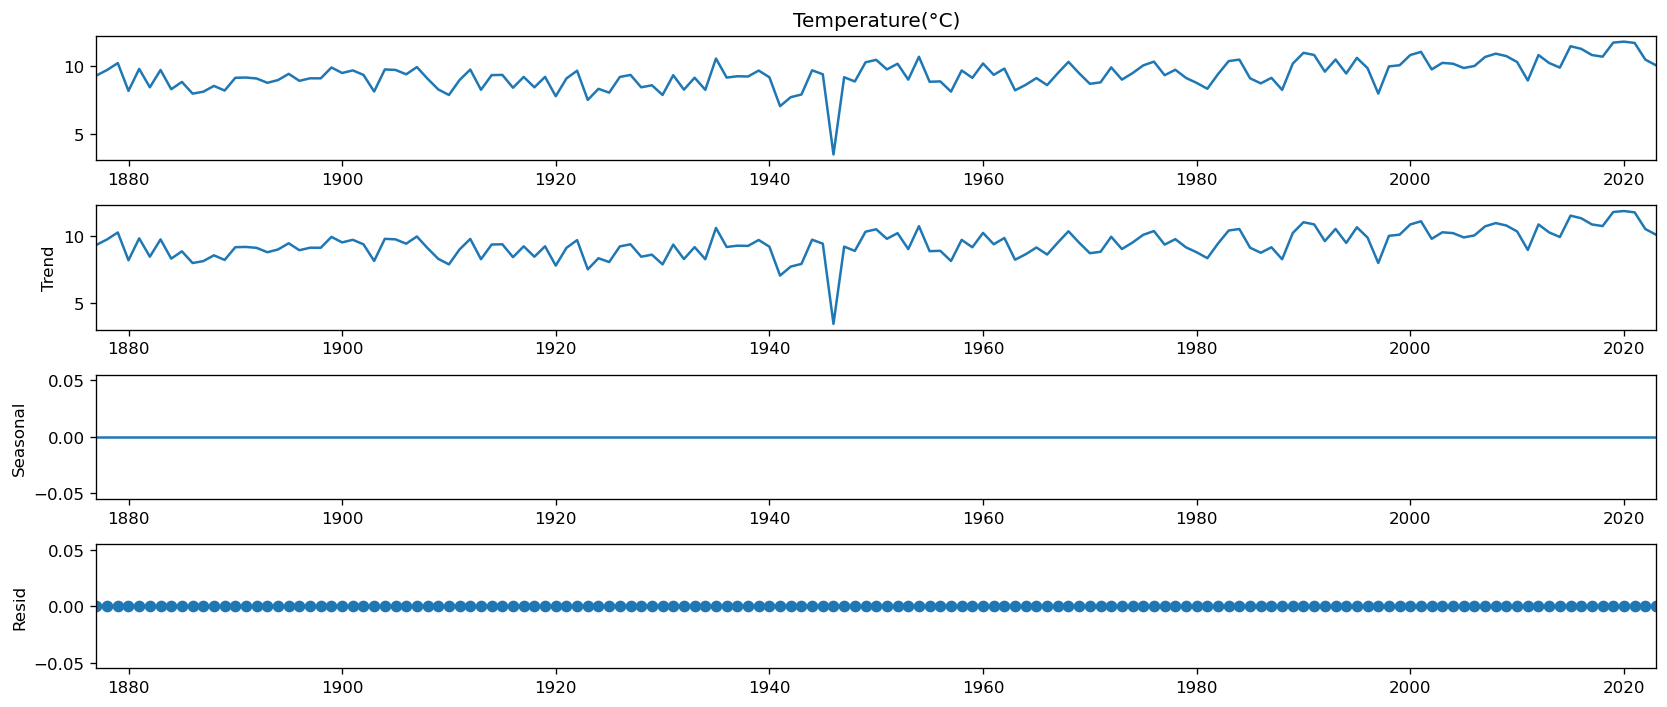

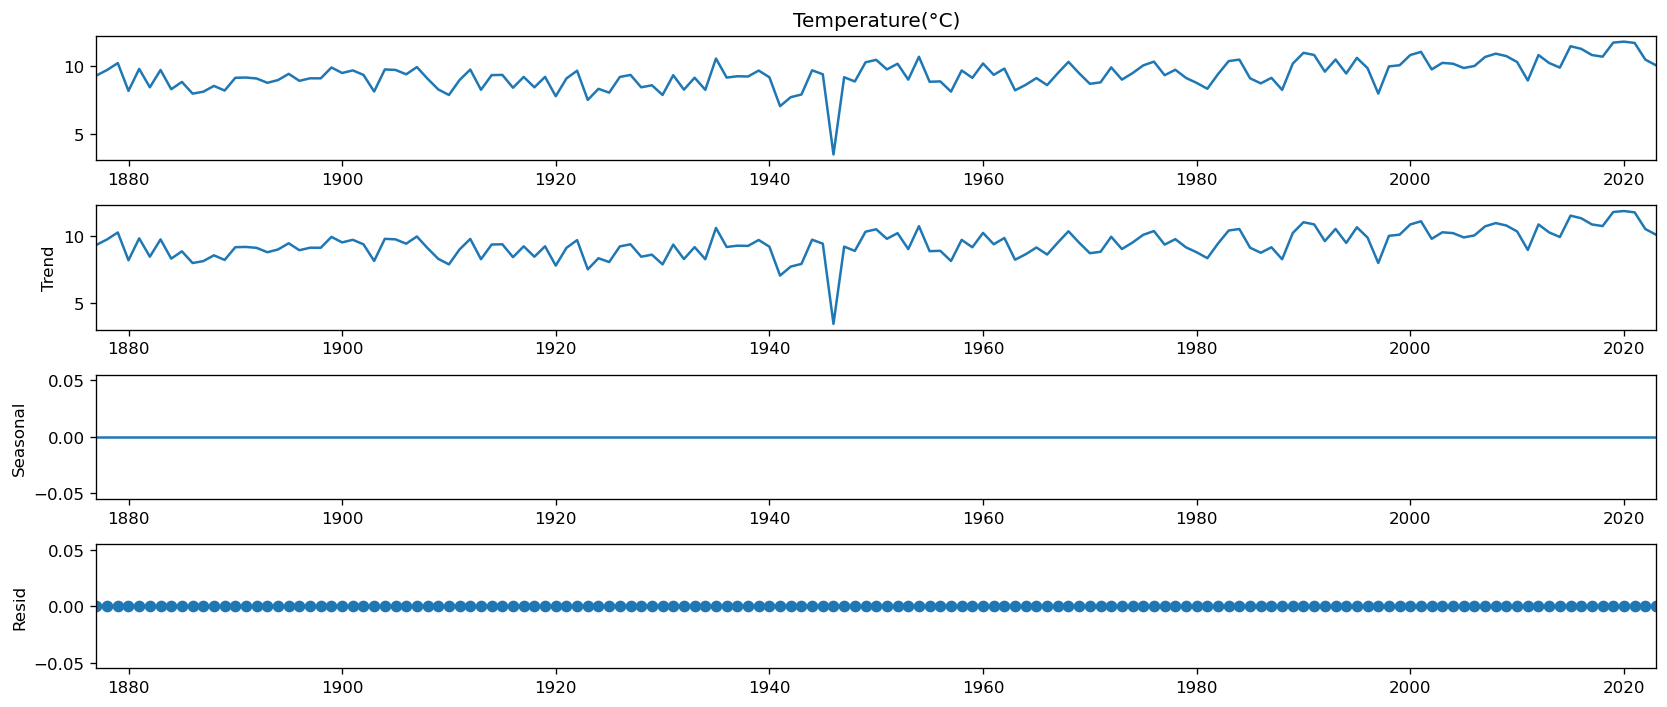

In [34]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
plt.rcParams['figure.figsize'] = (14,6)
decomposition.plot()

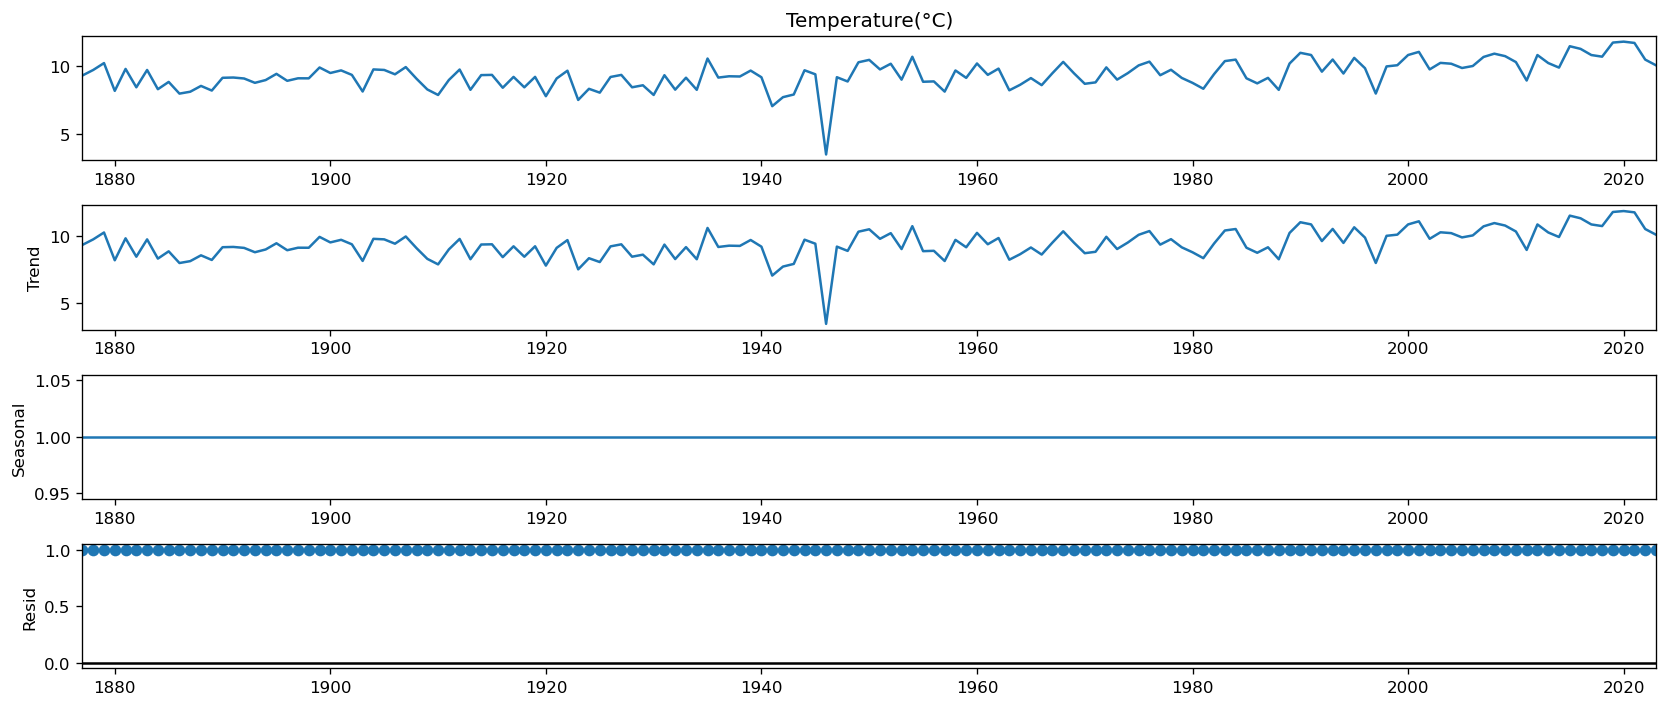

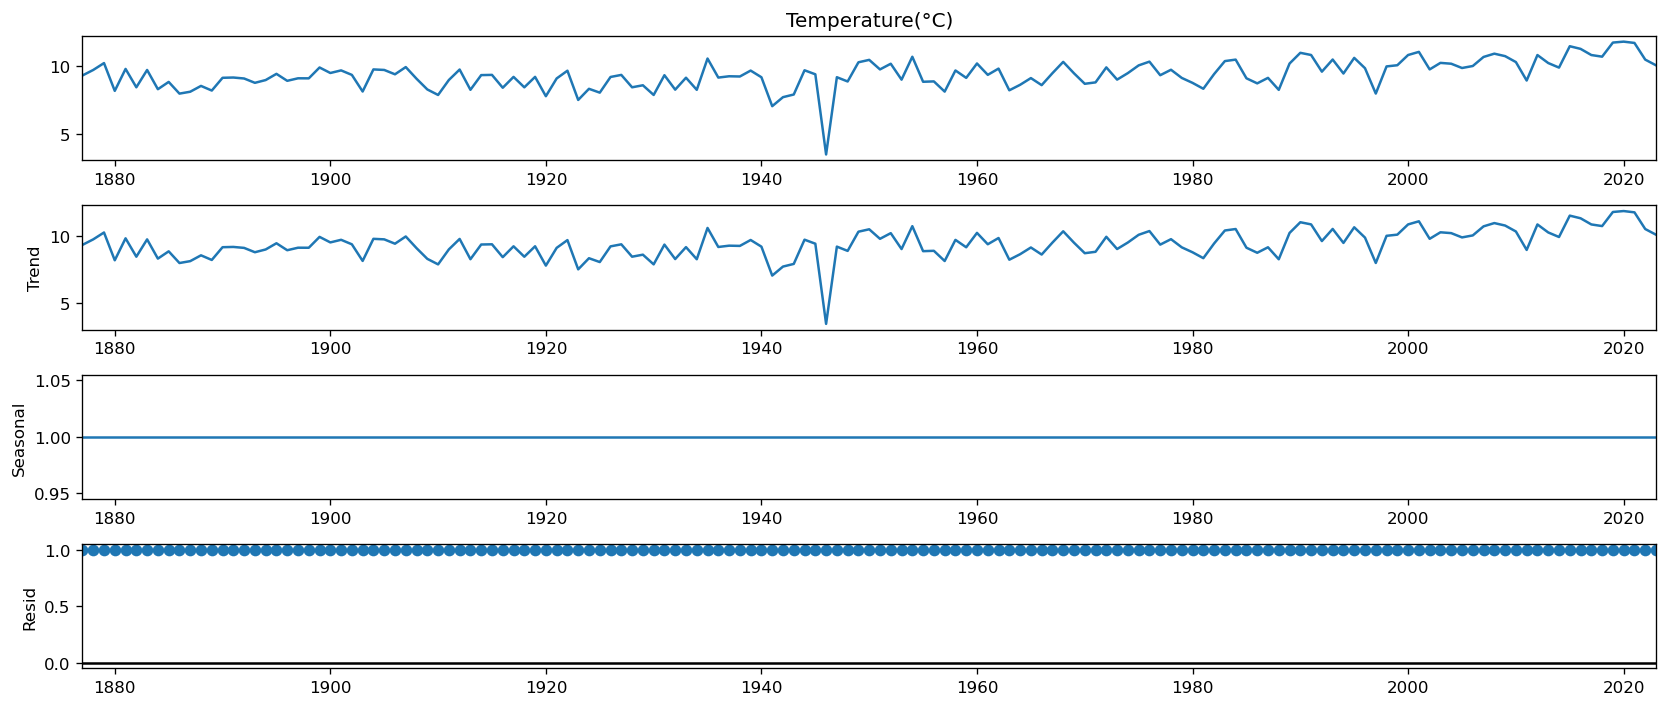

In [35]:
decomposition_multi = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomposition_multi.plot()

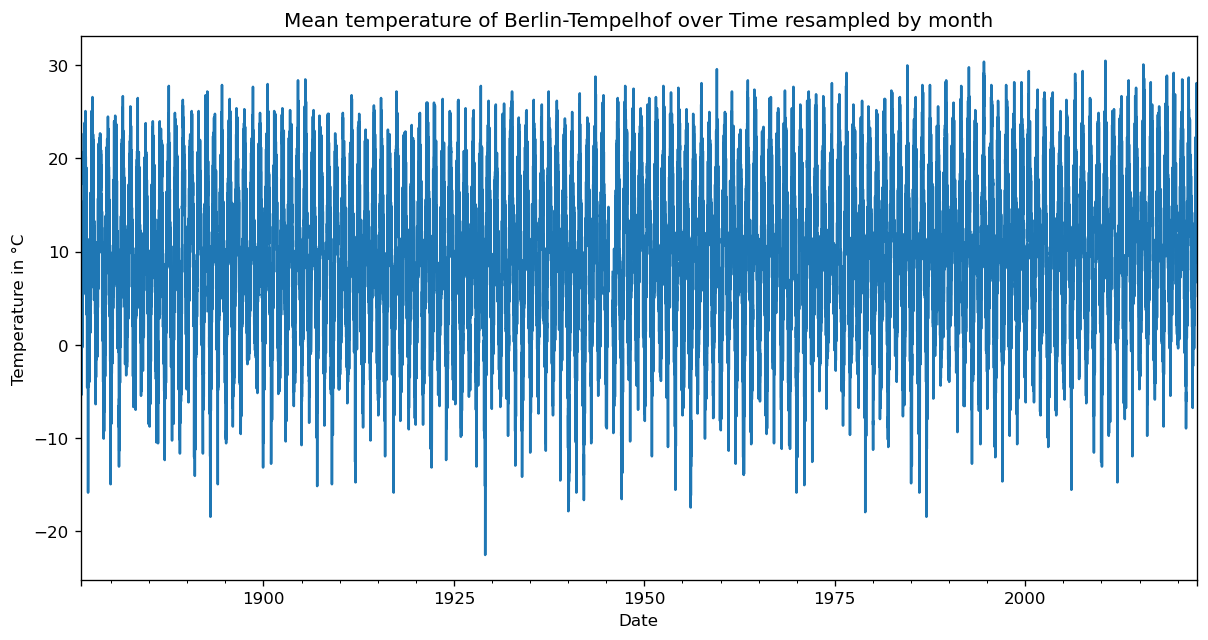

In [36]:
resample_day = berlin_temp_data.resample('D').mean()
resample_day.reset_index(inplace = True)

fig, ax = plt.subplots(figsize=(12,6))
resample_day.plot('DATE','Temperature(°C)',ax=ax)
ax.set(title = "Mean temperature of Berlin-Tempelhof over Time resampled by month")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature in °C")
ax.get_legend().remove()

In [37]:
berlin_temp_data

,SOUID,TG,Q_TG,Temperature(°C),timestep
DATE,,,,,
1876-01-01,127488,22,0,2.2,0
1876-01-02,127488,25,0,2.5,1
1876-01-03,127488,3,0,0.3,2
1876-01-04,127488,-58,0,-5.8,3
1876-01-05,127488,-98,0,-9.8,4
...,...,...,...,...,...
2022-06-26,111448,263,0,26.3,53307
2022-06-27,111448,281,0,28.1,53308
2022-06-28,111448,214,0,21.4,53309


In [38]:
berlin_temp_data

,SOUID,TG,Q_TG,Temperature(°C),timestep
DATE,,,,,
1876-01-01,127488,22,0,2.2,0
1876-01-02,127488,25,0,2.5,1
1876-01-03,127488,3,0,0.3,2
1876-01-04,127488,-58,0,-5.8,3
1876-01-05,127488,-98,0,-9.8,4
...,...,...,...,...,...
2022-06-26,111448,263,0,26.3,53307
2022-06-27,111448,281,0,28.1,53308
2022-06-28,111448,214,0,21.4,53309


In [39]:
# To model a linear trend
# Create a new feature named timestep
X = berlin_temp_data[['timestep']]
y = berlin_temp_data['Temperature(°C)']

In [40]:
X.dtypes

timestep    int64
dtype: object

In [41]:
berlin_temp_train = berlin_temp_data[:-365]
berlin_temp_test = berlin_temp_data[-365:]

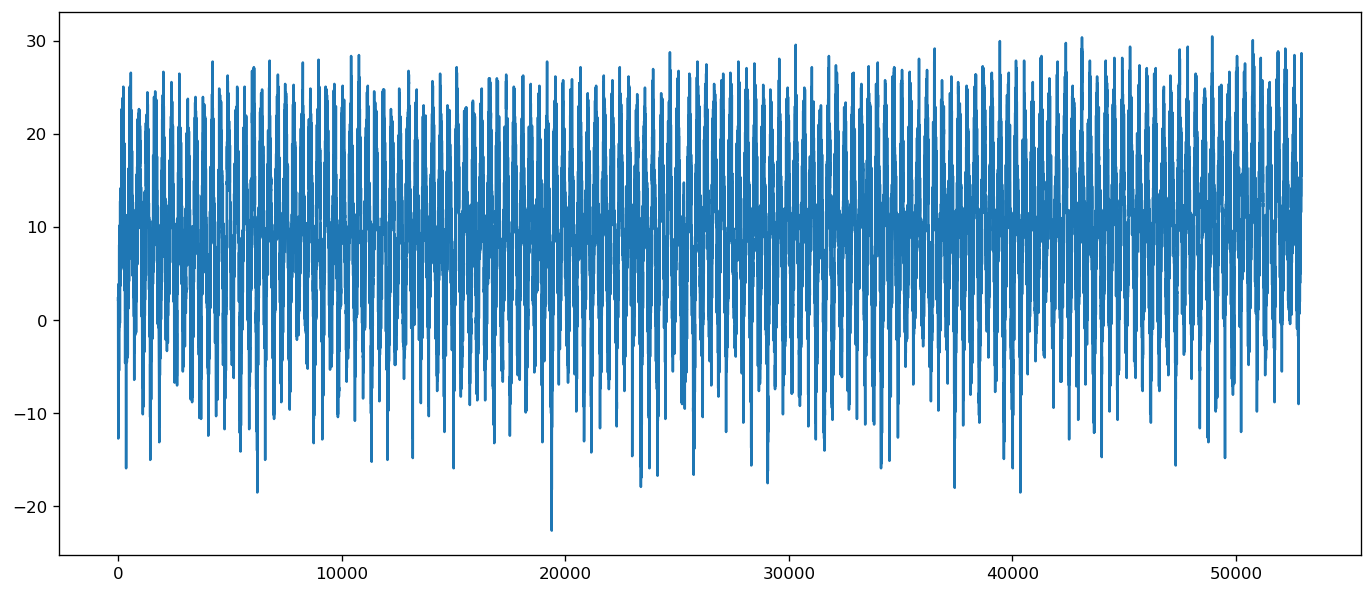

In [42]:
plt.plot(berlin_temp_train['timestep'], berlin_temp_train['Temperature(°C)'])

In [43]:
X_train = berlin_temp_train[['timestep']]
y_train = berlin_temp_train['Temperature(°C)']
X_test = berlin_temp_test[['timestep']]
y_test = berlin_temp_test['Temperature(°C)']

In [44]:
m = LinearRegression()

In [45]:
m.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred_lin = m.predict(X_test)

In [47]:
m.score(X_test, y_test)

-0.02330050064200262

In [48]:
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
linear_reg_rmse

7.215514508755129

In [49]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_transform = poly.fit_transform(X_train)

In [50]:
X_train_transform.shape, y_train.shape

((52947, 2), (52947,))

In [51]:
X_test_transform = poly.transform(X_test)

In [52]:
X_test_transform.shape, y_test.shape

((365, 2), (365,))

In [53]:
m_poly = LinearRegression()

In [54]:
m_poly.fit(X_train_transform, y_train)

LinearRegression()

In [55]:
y_pred = m_poly.predict(X_test_transform)

In [56]:
print("train score :", m_poly.score(X_train_transform, y_train))
print("test score  :", m_poly.score(X_test_transform, y_test))

train score : 0.005712995293569945
test score  : -0.0031082049102146847


In [57]:
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
poly_reg_rmse

7.143969674720757

In [58]:
berlin_temp_data.reset_index(inplace=True)

In [59]:
berlin_temp_data['Year'] = berlin_temp_data['DATE'].dt.year
berlin_temp_data['Month'] = berlin_temp_data['DATE'].dt.month
berlin_temp_data

,DATE,SOUID,TG,Q_TG,Temperature(°C),timestep,Year,Month
0,1876-01-01,127488,22,0,2.2,0,1876,1
1,1876-01-02,127488,25,0,2.5,1,1876,1
2,1876-01-03,127488,3,0,0.3,2,1876,1
3,1876-01-04,127488,-58,0,-5.8,3,1876,1
4,1876-01-05,127488,-98,0,-9.8,4,1876,1
...,...,...,...,...,...,...,...,...
53307,2022-06-26,111448,263,0,26.3,53307,2022,6
53308,2022-06-27,111448,281,0,28.1,53308,2022,6
53309,2022-06-28,111448,214,0,21.4,53309,2022,6
53310,2022-06-29,111448,214,0,21.4,53310,2022,6


/home/garima/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Temperature(°C)'>

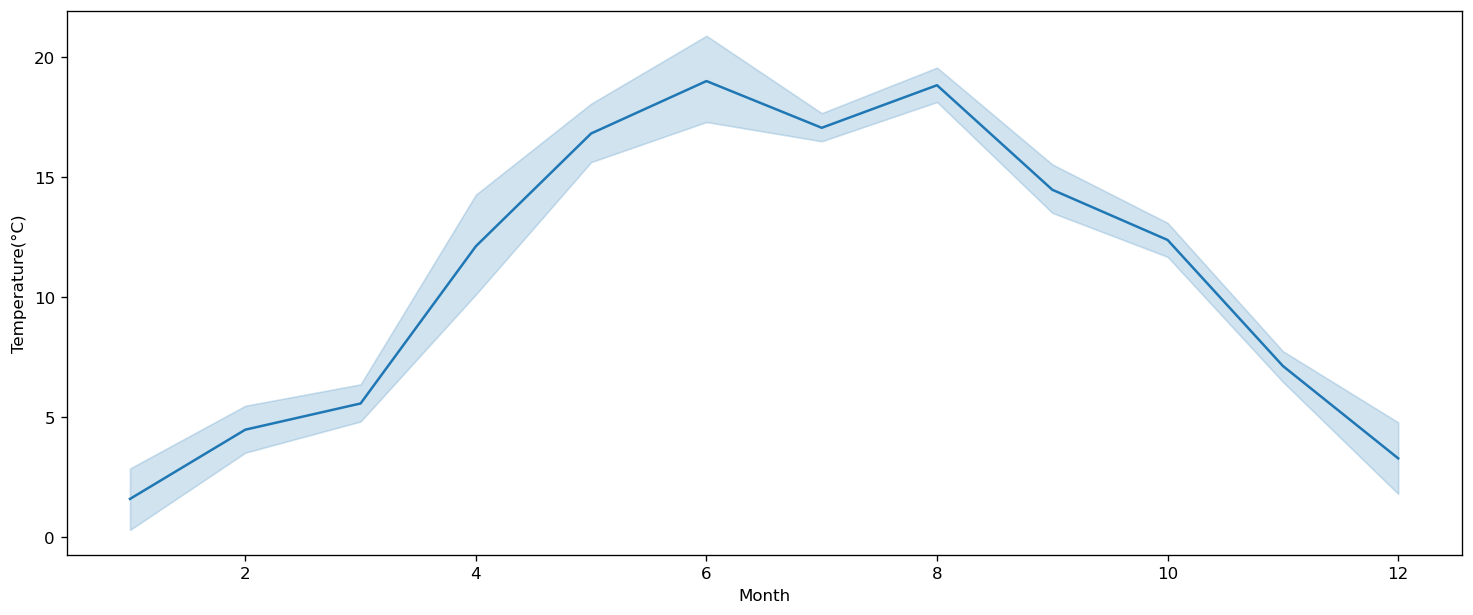

In [60]:
fig, ax = plt.subplots(figsize=(15, 6))
d = berlin_temp_data[berlin_temp_data['Year']==2000]
sns.lineplot(d['Month'], d['Temperature(°C)'])

<AxesSubplot:xlabel='Year', ylabel='Temperature(°C)'>

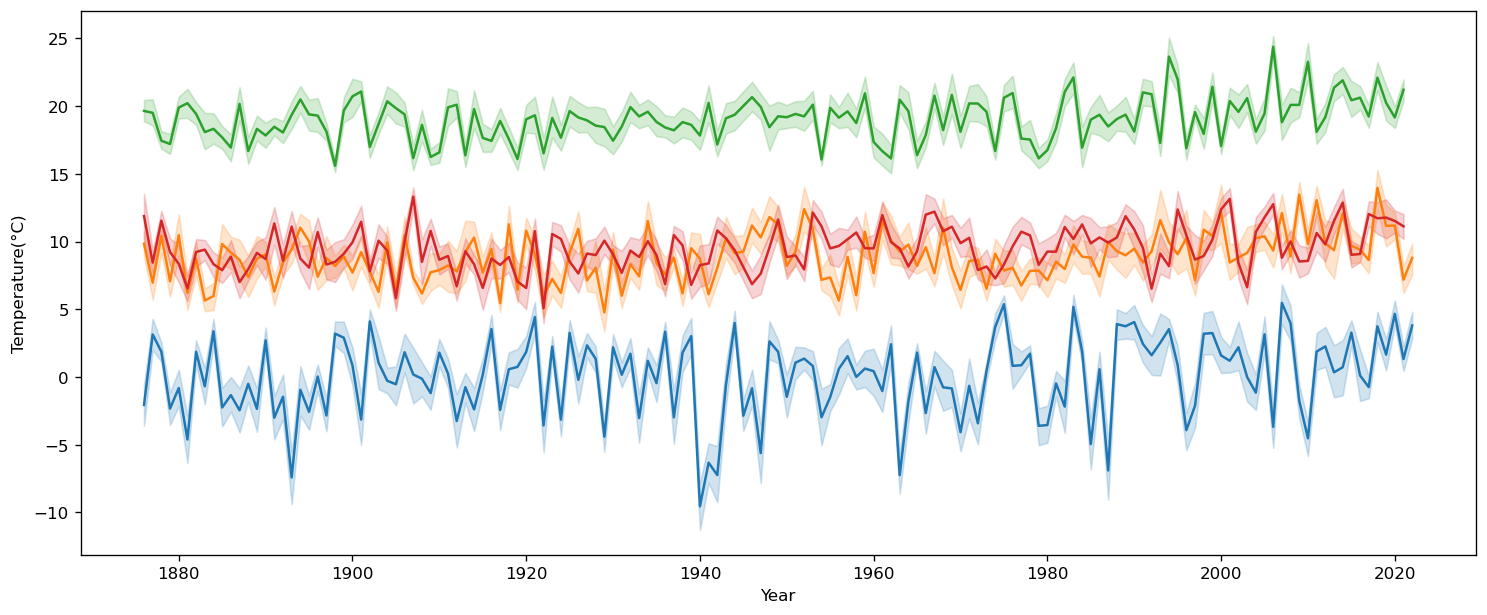

In [61]:
fig, ax = plt.subplots(figsize=(15, 6))
jan = berlin_temp_data[berlin_temp_data['Month']==1]
sns.lineplot(x = jan['Year'], y = jan['Temperature(°C)'])

april = berlin_temp_data[berlin_temp_data['Month']==4]
sns.lineplot(x = april['Year'], y = april['Temperature(°C)'])

july = berlin_temp_data[berlin_temp_data['Month']==7]
sns.lineplot(x = july['Year'], y = july['Temperature(°C)'])

october = berlin_temp_data[berlin_temp_data['Month']==10]
sns.lineplot(x = october['Year'], y = october['Temperature(°C)'])

In [62]:
temp_df

,SOUID,DATE,TG,Q_TG,Temperature(°C),timestep
0,127488,1876-01-01,22,0,2.2,0
1,127488,1876-01-02,25,0,2.5,1
2,127488,1876-01-03,3,0,0.3,2
3,127488,1876-01-04,-58,0,-5.8,3
4,127488,1876-01-05,-98,0,-9.8,4
...,...,...,...,...,...,...
53502,111448,2022-06-26,263,0,26.3,53307
53503,111448,2022-06-27,281,0,28.1,53308
53504,111448,2022-06-28,214,0,21.4,53309
53505,111448,2022-06-29,214,0,21.4,53310


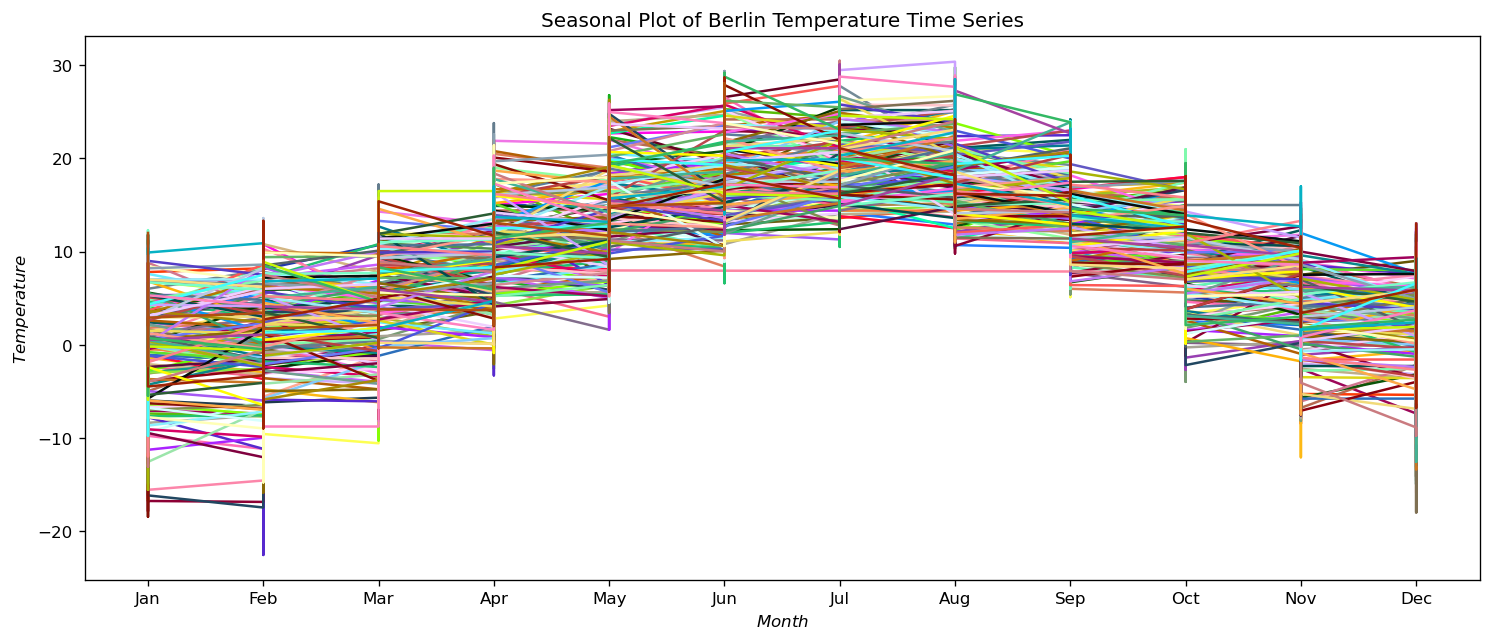

In [63]:
temp_df['year'] = [d.year for d in temp_df['DATE'].dt.date]
temp_df['month'] = [d.strftime('%b') for d in temp_df['DATE'].dt.date]
years = temp_df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(15,6))
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Temperature(°C)', data=temp_df.loc[temp_df.year==y, :], color=mycolors[i], label=y)
#        plt.text(temp_df.loc[temp_df.year==y, :].shape[0]-.9, temp_df.loc[temp_df.year==y, 'Temperature(°C)'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(ylabel='$Temperature$', xlabel='$Month$')
#plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Berlin Temperature Time Series")
plt.show()

In [64]:
temp_df

,SOUID,DATE,TG,Q_TG,Temperature(°C),timestep,year,month
0,127488,1876-01-01,22,0,2.2,0,1876,Jan
1,127488,1876-01-02,25,0,2.5,1,1876,Jan
2,127488,1876-01-03,3,0,0.3,2,1876,Jan
3,127488,1876-01-04,-58,0,-5.8,3,1876,Jan
4,127488,1876-01-05,-98,0,-9.8,4,1876,Jan
...,...,...,...,...,...,...,...,...
53502,111448,2022-06-26,263,0,26.3,53307,2022,Jun
53503,111448,2022-06-27,281,0,28.1,53308,2022,Jun
53504,111448,2022-06-28,214,0,21.4,53309,2022,Jun
53505,111448,2022-06-29,214,0,21.4,53310,2022,Jun


In [65]:
temp_df.set_index('DATE')

,SOUID,TG,Q_TG,Temperature(°C),timestep,year,month
DATE,,,,,,,
1876-01-01,127488,22,0,2.2,0,1876,Jan
1876-01-02,127488,25,0,2.5,1,1876,Jan
1876-01-03,127488,3,0,0.3,2,1876,Jan
1876-01-04,127488,-58,0,-5.8,3,1876,Jan
1876-01-05,127488,-98,0,-9.8,4,1876,Jan
...,...,...,...,...,...,...,...
2022-06-26,111448,263,0,26.3,53307,2022,Jun
2022-06-27,111448,281,0,28.1,53308,2022,Jun
2022-06-28,111448,214,0,21.4,53309,2022,Jun


In [66]:
temp_df.drop(['month','year'], axis=1)

,SOUID,DATE,TG,Q_TG,Temperature(°C),timestep
0,127488,1876-01-01,22,0,2.2,0
1,127488,1876-01-02,25,0,2.5,1
2,127488,1876-01-03,3,0,0.3,2
3,127488,1876-01-04,-58,0,-5.8,3
4,127488,1876-01-05,-98,0,-9.8,4
...,...,...,...,...,...,...
53502,111448,2022-06-26,263,0,26.3,53307
53503,111448,2022-06-27,281,0,28.1,53308
53504,111448,2022-06-28,214,0,21.4,53309
53505,111448,2022-06-29,214,0,21.4,53310


In [67]:
### Drop the columns not needed for train and test data

In [68]:
temp_df.drop(['SOUID','TG','Q_TG','year','month'], axis=1, inplace = True)

In [69]:
temp_df.head()

,DATE,Temperature(°C),timestep
0,1876-01-01,2.2,0
1,1876-01-02,2.5,1
2,1876-01-03,0.3,2
3,1876-01-04,-5.8,3
4,1876-01-05,-9.8,4


### Splitting data in train and test set by putting the last one year data in test set

In [70]:
train_set = temp_df.iloc[:-365]
test_set = temp_df.iloc[-365:]

### Plot trend and original data

In [71]:
X_trend_train = train_set[['timestep']]
y_trend_train = train_set['Temperature(°C)']

In [72]:
trend_lin_model = LinearRegression()

In [73]:
trend_lin_model.fit(X_trend_train, y_trend_train)

LinearRegression()

In [74]:
train_set['trend'] = trend_lin_model.predict(X_trend_train)

/tmp/ipykernel_50184/2884732632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['trend'] = trend_lin_model.predict(X_trend_train)


In [75]:
train_set['Temperature(°C)']

0         2.2
1         2.5
2         0.3
3        -5.8
4        -9.8
         ... 
53137    21.5
53138    22.1
53139    25.3
53140    24.1
53141    18.2
Name: Temperature(°C), Length: 52947, dtype: float64

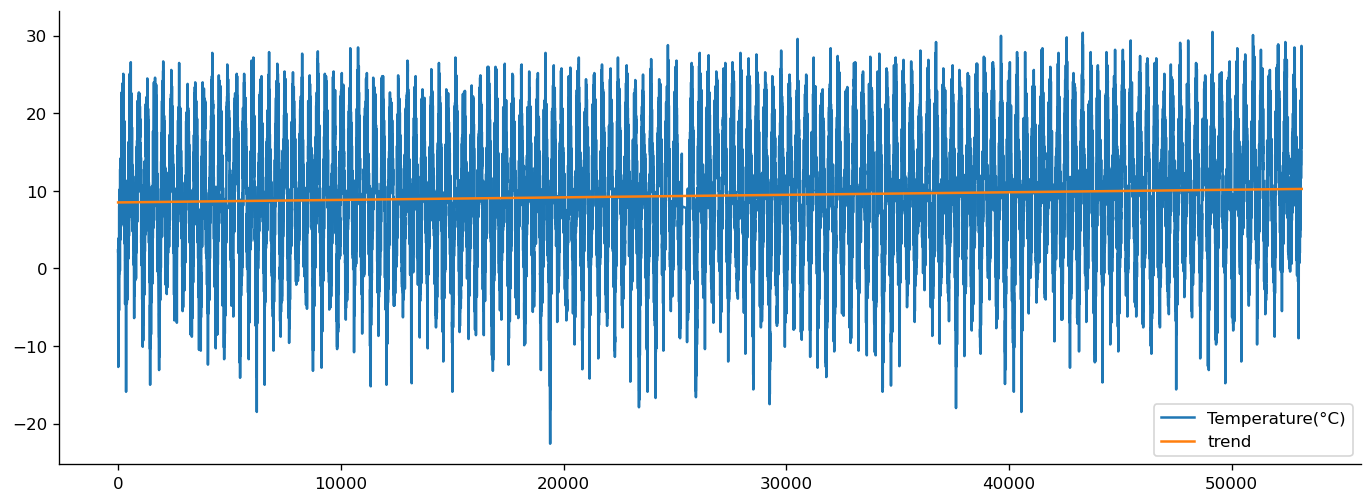

In [76]:
train_set[['Temperature(°C)','trend']].plot(figsize=(14,5),legend=True)
sns.despine()

### MODEL SEASONALITY

In [77]:
# subtract trend from data

train_set['detrended'] = train_set['Temperature(°C)'] - train_set['trend']

/tmp/ipykernel_50184/144069868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['detrended'] = train_set['Temperature(°C)'] - train_set['trend']


In [78]:
train_set.set_index(train_set['DATE'], inplace =True, drop = True)

In [79]:
train_set

,DATE,Temperature(°C),timestep,trend,detrended
DATE,,,,,
1876-01-01,1876-01-01,2.2,0,8.515045,-6.315045
1876-01-02,1876-01-02,2.5,1,8.515077,-6.015077
1876-01-03,1876-01-03,0.3,2,8.515110,-8.215110
1876-01-04,1876-01-04,-5.8,3,8.515143,-14.315143
1876-01-05,1876-01-05,-9.8,4,8.515176,-18.315176
...,...,...,...,...,...
2021-06-26,2021-06-26,21.5,52942,10.256354,11.243646
2021-06-27,2021-06-27,22.1,52943,10.256387,11.843613
2021-06-28,2021-06-28,25.3,52944,10.256420,15.043580


In [80]:
# create month column

train_set['Month'] = train_set.index.month

/tmp/ipykernel_50184/1395945737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Month'] = train_set.index.month


In [81]:
# make dummy columns for months
seasonal_dummies = pd.get_dummies(
    train_set.index.month, 
    prefix='month', 
    drop_first=True
).set_index(train_set.index)

In [82]:
# add dummy columns to our train_set dataframe, 
#it is similar to one-hot encoding
train_set = pd.concat([train_set, seasonal_dummies], axis=1)

In [83]:
train_set.columns

Index(['DATE', 'Temperature(°C)', 'timestep', 'trend', 'detrended', 'Month',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [84]:
# feature and target for seasonality model

X_seasonality = train_set[train_set.columns[-11:]]
y_seasonality = train_set['detrended']

In [85]:
# fit seasonality model

seasonality_model = LinearRegression()
seasonality_model.fit(X_seasonality, y_seasonality)

LinearRegression()

In [86]:
# predict from fitted model

train_set['seasonality'] = seasonality_model.predict(X_seasonality)

### Plot seasonality and detrended data

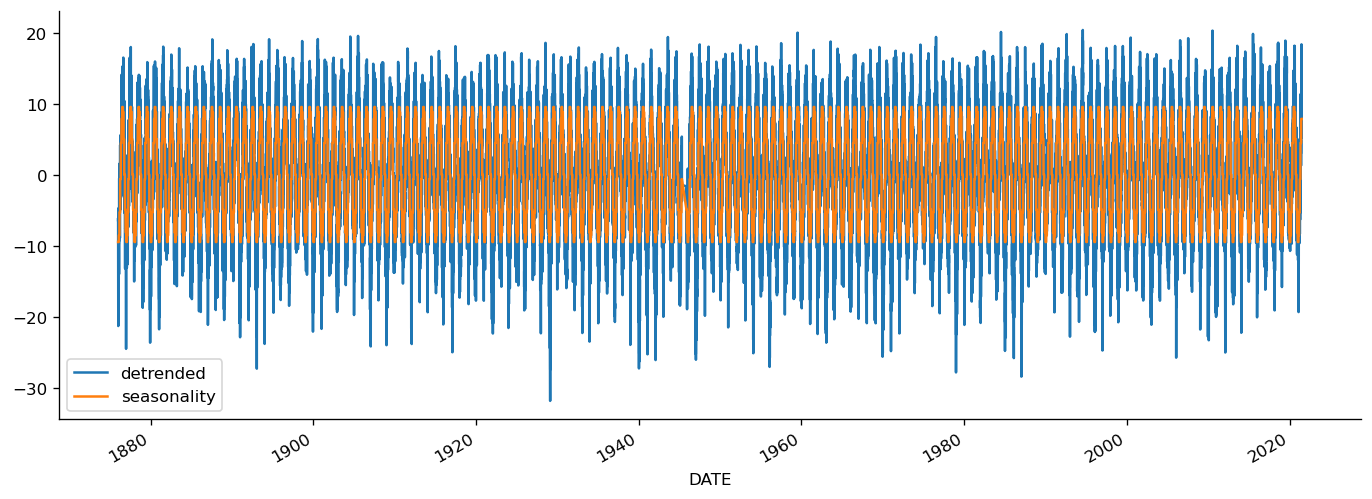

In [87]:
train_set[['detrended','seasonality']].plot(figsize=(14,5),legend=True)
sns.despine()

### Plot trend + seasonality and original data

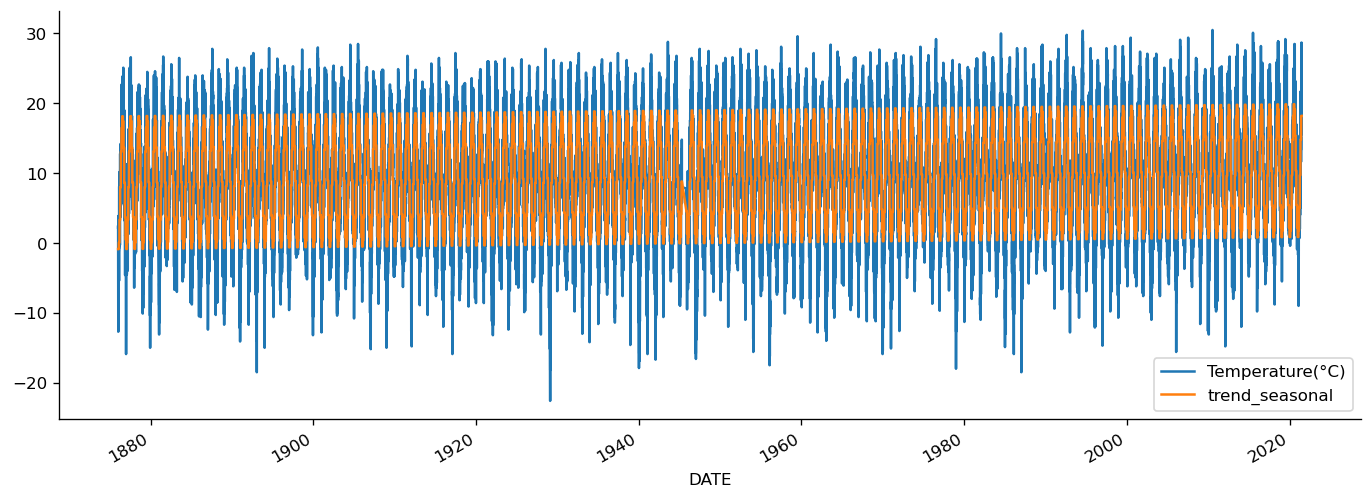

In [88]:
# combine trend and seasonality

train_set['trend_seasonal'] = train_set['trend'] + train_set['seasonality']

train_set[['Temperature(°C)','trend_seasonal']].plot(figsize=(14,5),legend=True)
sns.despine()

### Extract Remainder

In [89]:
# leftover time series devoid of trend and seasonality

train_set['remainder'] = train_set['Temperature(°C)'] - train_set['trend_seasonal']

In [90]:
train_set

,DATE,Temperature(°C),timestep,trend,detrended,Month,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonality,trend_seasonal,remainder
DATE,,,,,,,,,,,,,,,,,,,,
1876-01-01,1876-01-01,2.2,0,8.515045,-6.315045,1,0,0,0,0,0,0,0,0,0,0,0,-9.389232,-0.874187,3.074187
1876-01-02,1876-01-02,2.5,1,8.515077,-6.015077,1,0,0,0,0,0,0,0,0,0,0,0,-9.389232,-0.874154,3.374154
1876-01-03,1876-01-03,0.3,2,8.515110,-8.215110,1,0,0,0,0,0,0,0,0,0,0,0,-9.389232,-0.874121,1.174121
1876-01-04,1876-01-04,-5.8,3,8.515143,-14.315143,1,0,0,0,0,0,0,0,0,0,0,0,-9.389232,-0.874088,-4.925912
1876-01-05,1876-01-05,-9.8,4,8.515176,-18.315176,1,0,0,0,0,0,0,0,0,0,0,0,-9.389232,-0.874055,-8.925945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,2021-06-26,21.5,52942,10.256354,11.243646,6,0,0,0,0,1,0,0,0,0,0,0,7.948516,18.204870,3.295130
2021-06-27,2021-06-27,22.1,52943,10.256387,11.843613,6,0,0,0,0,1,0,0,0,0,0,0,7.948516,18.204903,3.895097
2021-06-28,2021-06-28,25.3,52944,10.256420,15.043580,6,0,0,0,0,1,0,0,0,0,0,0,7.948516,18.204936,7.095064


In [91]:
train_set.drop("DATE", axis =1, inplace = True)

#### Plot remainder

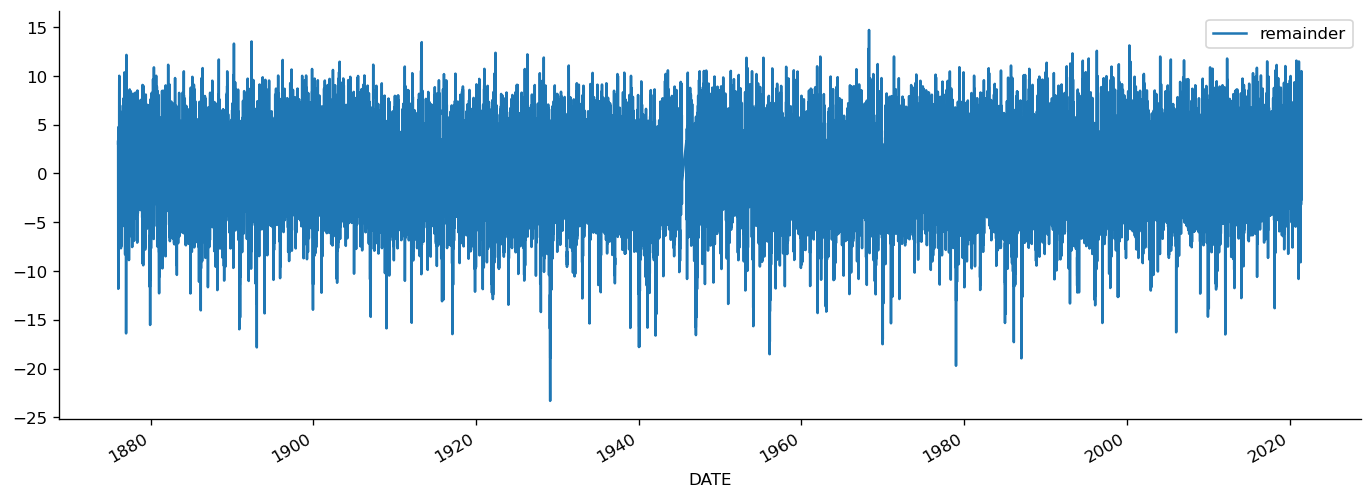

In [92]:
train_set['remainder'].plot(figsize=(14,5),legend=True)
sns.despine()

In [93]:
train_set.head(3)

,Temperature(°C),timestep,trend,detrended,Month,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonality,trend_seasonal,remainder
DATE,,,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.515045,-6.315045,1,0,0,0,0,0,0,0,0,0,0,0,-9.389232,-0.874187,3.074187
1876-01-02,2.5,1,8.515077,-6.015077,1,0,0,0,0,0,0,0,0,0,0,0,-9.389232,-0.874154,3.374154
1876-01-03,0.3,2,8.515110,-8.215110,1,0,0,0,0,0,0,0,0,0,0,0,-9.389232,-0.874121,1.174121


In [94]:
## for full model we need lags but not the remainder, so use create lags and later remove remainder

### Add the lags of the remainder to the training data

In [95]:
from statsmodels.tsa.ar_model import ar_select_order

selected_order = ar_select_order(train_set['remainder'], maxlag = 12)
lag_list = selected_order.ar_lags

/home/garima/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/garima/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [96]:
def create_lags(lag_list, df):
    for i in lag_list:
        lag = 'lag' + str(i)
        print(lag)
        df[lag] = df['remainder'].shift(i)
    return df

In [97]:
create_lags(lag_list,train_set)
train_set

lag1
lag2
lag3
lag4


,Temperature(°C),timestep,trend,detrended,Month,month_2,month_3,month_4,month_5,month_6,...,month_10,month_11,month_12,seasonality,trend_seasonal,remainder,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.515045,-6.315045,1,0,0,0,0,0,...,0,0,0,-9.389232,-0.874187,3.074187,NaN,NaN,NaN,NaN
1876-01-02,2.5,1,8.515077,-6.015077,1,0,0,0,0,0,...,0,0,0,-9.389232,-0.874154,3.374154,3.074187,NaN,NaN,NaN
1876-01-03,0.3,2,8.515110,-8.215110,1,0,0,0,0,0,...,0,0,0,-9.389232,-0.874121,1.174121,3.374154,3.074187,NaN,NaN
1876-01-04,-5.8,3,8.515143,-14.315143,1,0,0,0,0,0,...,0,0,0,-9.389232,-0.874088,-4.925912,1.174121,3.374154,3.074187,NaN
1876-01-05,-9.8,4,8.515176,-18.315176,1,0,0,0,0,0,...,0,0,0,-9.389232,-0.874055,-8.925945,-4.925912,1.174121,3.374154,3.074187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,21.5,52942,10.256354,11.243646,6,0,0,0,0,1,...,0,0,0,7.948516,18.204870,3.295130,2.195163,-0.704804,-0.704771,0.595262
2021-06-27,22.1,52943,10.256387,11.843613,6,0,0,0,0,1,...,0,0,0,7.948516,18.204903,3.895097,3.295130,2.195163,-0.704804,-0.704771
2021-06-28,25.3,52944,10.256420,15.043580,6,0,0,0,0,1,...,0,0,0,7.948516,18.204936,7.095064,3.895097,3.295130,2.195163,-0.704804


### Run the full model

In [98]:
train_set.dropna(inplace=True)

In [100]:
train_set

,Temperature(°C),timestep,trend,detrended,Month,month_2,month_3,month_4,month_5,month_6,...,month_10,month_11,month_12,seasonality,trend_seasonal,remainder,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,,,,,,
1876-01-05,-9.8,4,8.515176,-18.315176,1,0,0,0,0,0,...,0,0,0,-9.389232,-0.874055,-8.925945,-4.925912,1.174121,3.374154,3.074187
1876-01-06,-7.7,5,8.515209,-16.215209,1,0,0,0,0,0,...,0,0,0,-9.389232,-0.874023,-6.825977,-8.925945,-4.925912,1.174121,3.374154
1876-01-07,-6.6,6,8.515242,-15.115242,1,0,0,0,0,0,...,0,0,0,-9.389232,-0.873990,-5.726010,-6.825977,-8.925945,-4.925912,1.174121
1876-01-08,-8.9,7,8.515275,-17.415275,1,0,0,0,0,0,...,0,0,0,-9.389232,-0.873957,-8.026043,-5.726010,-6.825977,-8.925945,-4.925912
1876-01-09,-12.7,8,8.515308,-21.215308,1,0,0,0,0,0,...,0,0,0,-9.389232,-0.873924,-11.826076,-8.026043,-5.726010,-6.825977,-8.925945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,21.5,52942,10.256354,11.243646,6,0,0,0,0,1,...,0,0,0,7.948516,18.204870,3.295130,2.195163,-0.704804,-0.704771,0.595262
2021-06-27,22.1,52943,10.256387,11.843613,6,0,0,0,0,1,...,0,0,0,7.948516,18.204903,3.895097,3.295130,2.195163,-0.704804,-0.704771
2021-06-28,25.3,52944,10.256420,15.043580,6,0,0,0,0,1,...,0,0,0,7.948516,18.204936,7.095064,3.895097,3.295130,2.195163,-0.704804


In [101]:
# Assign X
X_full = train_set.drop(columns=['Temperature(°C)', 'Month', 'seasonality', 'trend','detrended', 'trend_seasonal', 'remainder'])
y_full = train_set['Temperature(°C)']

In [102]:
X_full.head(3)

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,
1876-01-05,4,0,0,0,0,0,0,0,0,0,0,0,-4.925912,1.174121,3.374154,3.074187
1876-01-06,5,0,0,0,0,0,0,0,0,0,0,0,-8.925945,-4.925912,1.174121,3.374154
1876-01-07,6,0,0,0,0,0,0,0,0,0,0,0,-6.825977,-8.925945,-4.925912,1.174121


In [103]:
y_full.head(3)

DATE
1876-01-05   -9.8
1876-01-06   -7.7
1876-01-07   -6.6
Name: Temperature(°C), dtype: float64

In [104]:
m_full = LinearRegression()
m_full.fit(X_full, y_full)

LinearRegression()

In [105]:
# Create a new predictions column
train_set['predictions_full_model'] = m_full.predict(X_full)

In [106]:
train_set.tail()

,Temperature(°C),timestep,trend,detrended,Month,month_2,month_3,month_4,month_5,month_6,...,month_11,month_12,seasonality,trend_seasonal,remainder,lag1,lag2,lag3,lag4,predictions_full_model
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-26,21.5,52942,10.256354,11.243646,6,0,0,0,0,1,...,0,0,7.948516,18.204870,3.295130,2.195163,-0.704804,-0.704771,0.595262,20.293491
2021-06-27,22.1,52943,10.256387,11.843613,6,0,0,0,0,1,...,0,0,7.948516,18.204903,3.895097,3.295130,2.195163,-0.704804,-0.704771,20.721554
2021-06-28,25.3,52944,10.256420,15.043580,6,0,0,0,0,1,...,0,0,7.948516,18.204936,7.095064,3.895097,3.295130,2.195163,-0.704804,21.219131
2021-06-29,24.1,52945,10.256453,13.843547,6,0,0,0,0,1,...,0,0,7.948516,18.204968,5.895032,7.095064,3.895097,3.295130,2.195163,24.152694
2021-06-30,18.2,52946,10.256485,7.943515,6,0,0,0,0,1,...,0,0,7.948516,18.205001,-0.005001,5.895032,7.095064,3.895097,3.295130,22.481659


### Plot the prediction vs passengers for the training data

In [107]:
def plot_temp(df, title='Temperature(°C) over Time in Berlin', ylim=True):
    '''
    Custom plotting function for plotting the flights dataset
    
    Parameters
    ----------
    df : pd.DataFrame
        The data to plot.
    title : str
        The title of the plot
    ylim : bool
        Whether to fix the minimum value of y; defalut is True
    
    Returns
    -------
    Plots the data
    '''
    df.plot()
    plt.title(title)
    plt.ylabel('Temperature(°C)')
    if ylim:
        plt.ylim(ymin=-15)
    plt.show()

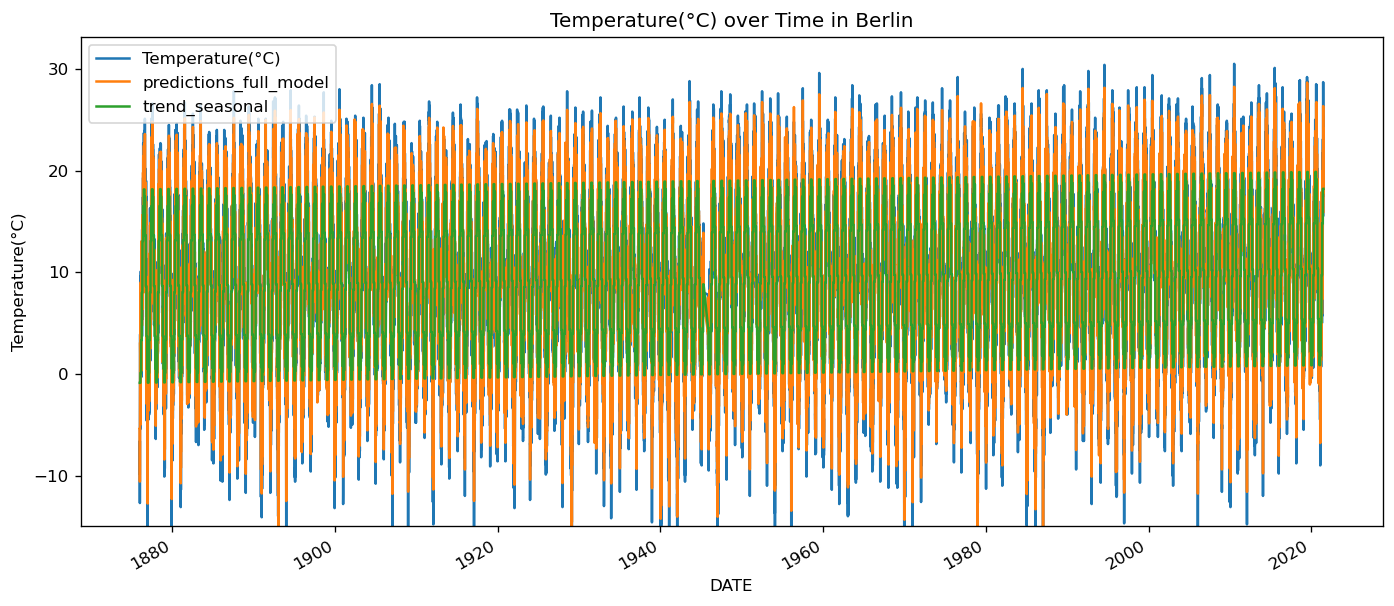

In [108]:
plot_temp(train_set[['Temperature(°C)', 'predictions_full_model', 'trend_seasonal']])

### Evaluate the model

### Cross-validation

In [109]:
# Create a TimeSeriesSplit object
ts_split = TimeSeriesSplit(n_splits=5)

In [110]:
# Split the training data into folds
for i, (train_index, validation_index) in enumerate(ts_split.split(X_full, y_full)):
    print(f"""The training data for the {i+1}th iteration are the observations steps 
    {train_index}""")
    print(f"""The validation data for the {i+1}th iteration are the observations steps
    {validation_index}""")
    print('\n')
    

The training data for the 1th iteration are the observations steps 
    [   0    1    2 ... 8825 8826 8827]
The validation data for the 1th iteration are the observations steps
    [ 8828  8829  8830 ... 17648 17649 17650]


The training data for the 2th iteration are the observations steps 
    [    0     1     2 ... 17648 17649 17650]
The validation data for the 2th iteration are the observations steps
    [17651 17652 17653 ... 26471 26472 26473]


The training data for the 3th iteration are the observations steps 
    [    0     1     2 ... 26471 26472 26473]
The validation data for the 3th iteration are the observations steps
    [26474 26475 26476 ... 35294 35295 35296]


The training data for the 4th iteration are the observations steps 
    [    0     1     2 ... 35294 35295 35296]
The validation data for the 4th iteration are the observations steps
    [35297 35298 35299 ... 44117 44118 44119]


The training data for the 5th iteration are the observations steps 
    [    0    

In [111]:
# Create the time series split
time_series_split = ts_split.split(X_full, y_full) 

In [112]:
# Do the cross validation: Remember these are the 'test scores' in the training data.
result = cross_val_score(estimator=m_full, 
                         X=X_full, y=y_full,
                         cv=time_series_split)
result

array([0.90528376, 0.91163216, 0.91414278, 0.90822875, 0.91823942])

In [113]:
cross_val_score?

In [114]:
result.mean()

0.911505374406096

### Test your model

In [115]:
# We finally use the test data.

In [116]:
test_set

,DATE,Temperature(°C),timestep
53142,2021-07-01,15.7,52947
53143,2021-07-02,19.9,52948
53144,2021-07-03,20.3,52949
53145,2021-07-04,22.5,52950
53146,2021-07-05,20.5,52951
...,...,...,...
53502,2022-06-26,26.3,53307
53503,2022-06-27,28.1,53308
53504,2022-06-28,21.4,53309
53505,2022-06-29,21.4,53310


In [117]:
# as we already created timestep before splitting the data into train and test set
# so we don't have to repeat that step and can proceed with creating dummies for seasonality in test data

In [118]:
#Now let's create the dummies for the seasonal component of the test.

In [119]:
test_set.set_index('DATE', drop = True, inplace = True)

In [120]:
test_set.head(5)

,Temperature(°C),timestep
DATE,,
2021-07-01,15.7,52947
2021-07-02,19.9,52948
2021-07-03,20.3,52949
2021-07-04,22.5,52950
2021-07-05,20.5,52951


In [121]:
# make dummy columns for months
seasonal_dummies = pd.get_dummies(
    test_set.index.month, 
    prefix='month', 
    drop_first=True
).set_index(test_set.index)

test_set = test_set.join(seasonal_dummies)
test_set.head()

,Temperature(°C),timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,,
2021-07-01,15.7,52947,0,0,0,0,0,1,0,0,0,0,0
2021-07-02,19.9,52948,0,0,0,0,0,1,0,0,0,0,0
2021-07-03,20.3,52949,0,0,0,0,0,1,0,0,0,0,0
2021-07-04,22.5,52950,0,0,0,0,0,1,0,0,0,0,0
2021-07-05,20.5,52951,0,0,0,0,0,1,0,0,0,0,0


In [122]:
X_test = test_set.drop(columns=['Temperature(°C)'])

In [123]:
X_test.head(2)

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,
2021-07-01,52947,0,0,0,0,0,1,0,0,0,0,0
2021-07-02,52948,0,0,0,0,0,1,0,0,0,0,0


#### Predict trend and seasonality for the test using m (which is trend_seasonal model for the training).

In [124]:
X_trend_test = test_set[['timestep']]

In [125]:
# predicting trend of test set using already trained trend model (on train date)
test_set['trend'] = trend_lin_model.predict(X_trend_test)

In [126]:
# detrend it

test_set['detrended'] = test_set['Temperature(°C)'] - test_set['trend']

In [127]:
test_set.drop(['detrended'], axis=1)

,Temperature(°C),timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend
DATE,,,,,,,,,,,,,,
2021-07-01,15.7,52947,0,0,0,0,0,1,0,0,0,0,0,10.256518
2021-07-02,19.9,52948,0,0,0,0,0,1,0,0,0,0,0,10.256551
2021-07-03,20.3,52949,0,0,0,0,0,1,0,0,0,0,0,10.256584
2021-07-04,22.5,52950,0,0,0,0,0,1,0,0,0,0,0,10.256617
2021-07-05,20.5,52951,0,0,0,0,0,1,0,0,0,0,0,10.256650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,26.3,53307,0,0,0,0,1,0,0,0,0,0,0,10.268359
2022-06-27,28.1,53308,0,0,0,0,1,0,0,0,0,0,0,10.268392
2022-06-28,21.4,53309,0,0,0,0,1,0,0,0,0,0,0,10.268425


In [128]:
test_set.head(2)

,Temperature(°C),timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend,detrended
DATE,,,,,,,,,,,,,,,
2021-07-01,15.7,52947,0,0,0,0,0,1,0,0,0,0,0,10.256518,5.443482
2021-07-02,19.9,52948,0,0,0,0,0,1,0,0,0,0,0,10.256551,9.643449


In [129]:
X_test_seasonality = test_set.drop(['Temperature(°C)','timestep','trend','detrended'], axis=1)

In [130]:
X_test_seasonality.head(2)

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,
2021-07-01,0,0,0,0,0,1,0,0,0,0,0
2021-07-02,0,0,0,0,0,1,0,0,0,0,0


In [131]:
# predicting seasonality of test_set using the already trained seasonality model
test_set['seasonality'] = seasonality_model.predict(X_test_seasonality)

In [132]:
# combine trend and seasonality

test_set['trend_seasonal'] = test_set['trend'] + test_set['seasonality']

In [133]:
# calculating remainder of test_set
test_set['remainder'] = test_set['Temperature(°C)'] - test_set['trend'] - test_set['seasonality']

In [134]:
# create lag columns using the above-defined function with p value same as the train data

In [135]:
create_lags(lag_list,test_set).head(5)

lag1
lag2
lag3
lag4


,Temperature(°C),timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_12,trend,detrended,seasonality,trend_seasonal,remainder,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,,,,,,
2021-07-01,15.7,52947,0,0,0,0,0,1,0,0,...,0,10.256518,5.443482,9.62717,19.883688,-4.183688,NaN,NaN,NaN,NaN
2021-07-02,19.9,52948,0,0,0,0,0,1,0,0,...,0,10.256551,9.643449,9.62717,19.883721,0.016279,-4.183688,NaN,NaN,NaN
2021-07-03,20.3,52949,0,0,0,0,0,1,0,0,...,0,10.256584,10.043416,9.62717,19.883754,0.416246,0.016279,-4.183688,NaN,NaN
2021-07-04,22.5,52950,0,0,0,0,0,1,0,0,...,0,10.256617,12.243383,9.62717,19.883787,2.616213,0.416246,0.016279,-4.183688,NaN
2021-07-05,20.5,52951,0,0,0,0,0,1,0,0,...,0,10.256650,10.243350,9.62717,19.883820,0.616180,2.616213,0.416246,0.016279,-4.183688


In [136]:
train_set.tail(1)

,Temperature(°C),timestep,trend,detrended,Month,month_2,month_3,month_4,month_5,month_6,...,month_11,month_12,seasonality,trend_seasonal,remainder,lag1,lag2,lag3,lag4,predictions_full_model
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-30,18.2,52946,10.256485,7.943515,6,0,0,0,0,1,...,0,0,7.948516,18.205001,-0.005001,5.895032,7.095064,3.895097,3.29513,22.481659


In [137]:
# function to fill NaN values in 1st row of test data(lag columns) using the last column of train data
def fill_test_lags(train_set,test_set,date_train,date_test):
    
    lag_train = 'remainder'
    lag_test = 'lag1'
    print(lag_list)
    for i in lag_list:
        print(lag_train)
        value_array = train_set[train_set.index == date_train][lag_train].values
        value = value_array.item()
        test_set[lag_test][test_set.index == date_test] = value
        lag_train = 'lag' + str(i)
        lag_test = 'lag' + str(i+1)
    return test_set.head(5)

In [138]:
fill_test_lags(train_set,test_set,'2021-06-30','2021-07-01')

[1, 2, 3, 4]
remainder
lag1
lag2
lag3


/tmp/ipykernel_50184/143530541.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set[lag_test][test_set.index == date_test] = value


,Temperature(°C),timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_12,trend,detrended,seasonality,trend_seasonal,remainder,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,,,,,,
2021-07-01,15.7,52947,0,0,0,0,0,1,0,0,...,0,10.256518,5.443482,9.62717,19.883688,-4.183688,-0.005001,5.895032,7.095064,3.895097
2021-07-02,19.9,52948,0,0,0,0,0,1,0,0,...,0,10.256551,9.643449,9.62717,19.883721,0.016279,-4.183688,NaN,NaN,NaN
2021-07-03,20.3,52949,0,0,0,0,0,1,0,0,...,0,10.256584,10.043416,9.62717,19.883754,0.416246,0.016279,-4.183688,NaN,NaN
2021-07-04,22.5,52950,0,0,0,0,0,1,0,0,...,0,10.256617,12.243383,9.62717,19.883787,2.616213,0.416246,0.016279,-4.183688,NaN
2021-07-05,20.5,52951,0,0,0,0,0,1,0,0,...,0,10.256650,10.243350,9.62717,19.883820,0.616180,2.616213,0.416246,0.016279,-4.183688


In [139]:
test_set

,Temperature(°C),timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_12,trend,detrended,seasonality,trend_seasonal,remainder,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,,,,,,
2021-07-01,15.7,52947,0,0,0,0,0,1,0,0,...,0,10.256518,5.443482,9.627170,19.883688,-4.183688,-0.005001,5.895032,7.095064,3.895097
2021-07-02,19.9,52948,0,0,0,0,0,1,0,0,...,0,10.256551,9.643449,9.627170,19.883721,0.016279,-4.183688,NaN,NaN,NaN
2021-07-03,20.3,52949,0,0,0,0,0,1,0,0,...,0,10.256584,10.043416,9.627170,19.883754,0.416246,0.016279,-4.183688,NaN,NaN
2021-07-04,22.5,52950,0,0,0,0,0,1,0,0,...,0,10.256617,12.243383,9.627170,19.883787,2.616213,0.416246,0.016279,-4.183688,NaN
2021-07-05,20.5,52951,0,0,0,0,0,1,0,0,...,0,10.256650,10.243350,9.627170,19.883820,0.616180,2.616213,0.416246,0.016279,-4.183688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,26.3,53307,0,0,0,0,1,0,0,0,...,0,10.268359,16.031641,7.948516,18.216875,8.083125,5.683158,7.183191,5.383224,3.083257
2022-06-27,28.1,53308,0,0,0,0,1,0,0,0,...,0,10.268392,17.831608,7.948516,18.216908,9.883092,8.083125,5.683158,7.183191,5.383224
2022-06-28,21.4,53309,0,0,0,0,1,0,0,0,...,0,10.268425,11.131575,7.948516,18.216941,3.183059,9.883092,8.083125,5.683158,7.183191


In [140]:
#Filling in the missing value using the first row of the test dataset.
for i in lag_list:
    value_array = test_set['lag' + str(i)][test_set.index == '2021-07-01'].values
    value = value_array.item()
    print(value)
    j = i +1
    if j <=len(lag_list):
        test_set['lag' + str(j)][test_set.index == '2021-07-02'] = value
        if j <=(len(lag_list)-1):
            test_set['lag' + str(j+1)][test_set.index == '2021-07-03'] = value
            if j <=(len(lag_list)-2):
                test_set['lag' + str(j+2)][test_set.index == '2021-07-04'] = value 

-0.00500129531760507
5.895031595570337


/tmp/ipykernel_50184/3506467664.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['lag' + str(j)][test_set.index == '2021-07-02'] = value
/tmp/ipykernel_50184/3506467664.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['lag' + str(j+1)][test_set.index == '2021-07-03'] = value
/tmp/ipykernel_50184/3506467664.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['lag' + str(j+2)][test_set.index == '2021-07

7.095064486458281
3.895097377346225


In [141]:
test_set

,Temperature(°C),timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_12,trend,detrended,seasonality,trend_seasonal,remainder,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,,,,,,
2021-07-01,15.7,52947,0,0,0,0,0,1,0,0,...,0,10.256518,5.443482,9.627170,19.883688,-4.183688,-0.005001,5.895032,7.095064,3.895097
2021-07-02,19.9,52948,0,0,0,0,0,1,0,0,...,0,10.256551,9.643449,9.627170,19.883721,0.016279,-4.183688,-0.005001,5.895032,7.095064
2021-07-03,20.3,52949,0,0,0,0,0,1,0,0,...,0,10.256584,10.043416,9.627170,19.883754,0.416246,0.016279,-4.183688,-0.005001,5.895032
2021-07-04,22.5,52950,0,0,0,0,0,1,0,0,...,0,10.256617,12.243383,9.627170,19.883787,2.616213,0.416246,0.016279,-4.183688,-0.005001
2021-07-05,20.5,52951,0,0,0,0,0,1,0,0,...,0,10.256650,10.243350,9.627170,19.883820,0.616180,2.616213,0.416246,0.016279,-4.183688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,26.3,53307,0,0,0,0,1,0,0,0,...,0,10.268359,16.031641,7.948516,18.216875,8.083125,5.683158,7.183191,5.383224,3.083257
2022-06-27,28.1,53308,0,0,0,0,1,0,0,0,...,0,10.268392,17.831608,7.948516,18.216908,9.883092,8.083125,5.683158,7.183191,5.383224
2022-06-28,21.4,53309,0,0,0,0,1,0,0,0,...,0,10.268425,11.131575,7.948516,18.216941,3.183059,9.883092,8.083125,5.683158,7.183191


In [142]:
#test_set.dropna(inplace=True)

In [146]:
# Assign X
X_full_test = test_set.drop(columns=['Temperature(°C)', 'seasonality', 'trend','detrended', 'remainder','trend_seasonal'])
y_full_test = test_set['Temperature(°C)']

In [147]:
X_full_test.head(2)

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,
2021-07-01,52947,0,0,0,0,0,1,0,0,0,0,0,-0.005001,5.895032,7.095064,3.895097
2021-07-02,52948,0,0,0,0,0,1,0,0,0,0,0,-4.183688,-0.005001,5.895032,7.095064


In [148]:
# Create a new predictions column
test_set['predictions_full_model'] = m_full.predict(X_full_test)

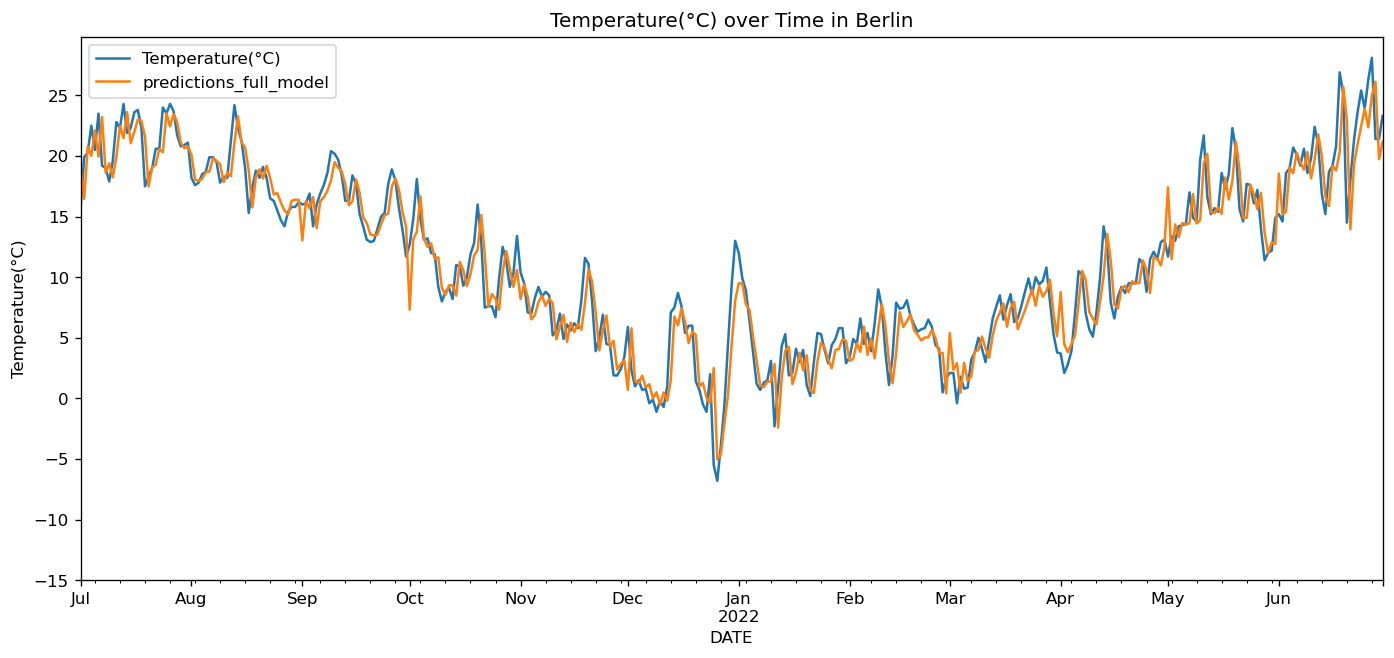

In [149]:
plot_temp(test_set[['Temperature(°C)', 'predictions_full_model']])

In [150]:
m_full.score(X_full_test, y_full_test)

0.9166449926958951

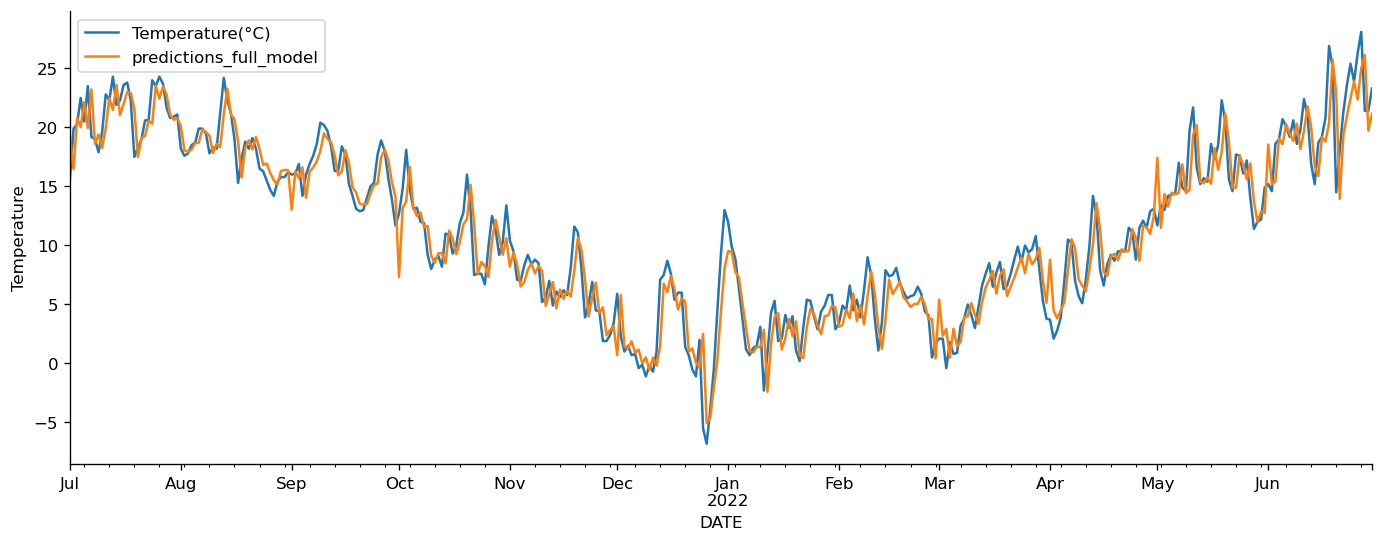

In [233]:
# plot last ~3 years
df_plot_test = test_set[-1000:]
df_plot_test[['Temperature(°C)', 'predictions_full_model']].plot(figsize=(14,5),legend=True)
plt.xlabel('DATE')
plt.ylabel('Temperature')
sns.despine()

In [151]:
train_set

,Temperature(°C),timestep,trend,detrended,Month,month_2,month_3,month_4,month_5,month_6,...,month_11,month_12,seasonality,trend_seasonal,remainder,lag1,lag2,lag3,lag4,predictions_full_model
DATE,,,,,,,,,,,,,,,,,,,,,
1876-01-05,-9.8,4,8.515176,-18.315176,1,0,0,0,0,0,...,0,0,-9.389232,-0.874055,-8.925945,-4.925912,1.174121,3.374154,3.074187,-5.363764
1876-01-06,-7.7,5,8.515209,-16.215209,1,0,0,0,0,0,...,0,0,-9.389232,-0.874023,-6.825977,-8.925945,-4.925912,1.174121,3.374154,-7.975098
1876-01-07,-6.6,6,8.515242,-15.115242,1,0,0,0,0,0,...,0,0,-9.389232,-0.873990,-5.726010,-6.825977,-8.925945,-4.925912,1.174121,-5.641943
1876-01-08,-8.9,7,8.515275,-17.415275,1,0,0,0,0,0,...,0,0,-9.389232,-0.873957,-8.026043,-5.726010,-6.825977,-8.925945,-4.925912,-5.358308
1876-01-09,-12.7,8,8.515308,-21.215308,1,0,0,0,0,0,...,0,0,-9.389232,-0.873924,-11.826076,-8.026043,-5.726010,-6.825977,-8.925945,-7.636556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,21.5,52942,10.256354,11.243646,6,0,0,0,0,1,...,0,0,7.948516,18.204870,3.295130,2.195163,-0.704804,-0.704771,0.595262,20.293491
2021-06-27,22.1,52943,10.256387,11.843613,6,0,0,0,0,1,...,0,0,7.948516,18.204903,3.895097,3.295130,2.195163,-0.704804,-0.704771,20.721554
2021-06-28,25.3,52944,10.256420,15.043580,6,0,0,0,0,1,...,0,0,7.948516,18.204936,7.095064,3.895097,3.295130,2.195163,-0.704804,21.219131


## Combine train and test data

In [157]:
# Combine train and test data
temp_combined = train_set.append(test_set)
temp_combined.head(3)
temp_combined.tail(3)

/tmp/ipykernel_50184/3460901996.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_combined = train_set.append(test_set)


,Temperature(°C),timestep,trend,detrended,Month,month_2,month_3,month_4,month_5,month_6,...,month_11,month_12,seasonality,trend_seasonal,remainder,lag1,lag2,lag3,lag4,predictions_full_model
DATE,,,,,,,,,,,,,,,,,,,,,
2022-06-28,21.4,53309,10.268425,11.131575,NaN,0,0,0,0,1,...,0,0,7.948516,18.216941,3.183059,9.883092,8.083125,5.683158,7.183191,26.130518
2022-06-29,21.4,53310,10.268458,11.131542,NaN,0,0,0,0,1,...,0,0,7.948516,18.216974,3.183026,3.183059,9.883092,8.083125,5.683158,19.730884
2022-06-30,23.3,53311,10.268491,13.031509,NaN,0,0,0,0,1,...,0,0,7.948516,18.217006,5.082994,3.183026,3.183059,9.883092,8.083125,21.166333


In [166]:
# Re-train the model on the whole dataset
X_combined = temp_combined.drop(columns=['Temperature(°C)','trend','detrended', 'trend_seasonal','seasonality', 'remainder', 'predictions_full_model','Month'])
y_combined = temp_combined['Temperature(°C)']

In [168]:
m_combined = LinearRegression()
m_combined.fit(X_combined, y_combined)

LinearRegression()

In [182]:
X_combined.tail(1)

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,
2022-06-30,53311,0,0,0,0,1,0,0,0,0,0,0,3.183026,3.183059,9.883092,8.083125


In [178]:
temp_combined.tail(1)

,Temperature(°C),timestep,trend,detrended,Month,month_2,month_3,month_4,month_5,month_6,...,month_11,month_12,seasonality,trend_seasonal,remainder,lag1,lag2,lag3,lag4,predictions_full_model
DATE,,,,,,,,,,,,,,,,,,,,,
2022-06-30,23.3,53311,10.268491,13.031509,NaN,0,0,0,0,1,...,0,0,7.948516,18.217006,5.082994,3.183026,3.183059,9.883092,8.083125,21.166333


In [170]:
temp_combined.loc['2022-06-30']

Temperature(°C)              23.300000
timestep                  53311.000000
trend                        10.268491
detrended                    13.031509
Month                              NaN
month_2                       0.000000
month_3                       0.000000
month_4                       0.000000
month_5                       0.000000
month_6                       1.000000
month_7                       0.000000
month_8                       0.000000
month_9                       0.000000
month_10                      0.000000
month_11                      0.000000
month_12                      0.000000
seasonality                   7.948516
trend_seasonal               18.217006
remainder                     5.082994
lag1                          3.183026
lag2                          3.183059
lag3                          9.883092
lag4                          8.083125
predictions_full_model       21.166333
Name: 2022-06-30 00:00:00, dtype: float64

In [222]:
# What is the first date in the future? --> 2022-07-01
timestep = temp_combined['timestep'].max() + 1
months = [0]*5 + [1] + [0]*5
#lag = temp_combined.loc['2022-06-30', 'remainder']
lag1=5.082994
lag2=3.183026
lag3=3.183059
lag4=9.883092

In [223]:
timestep, months, lag1, lag2, lag3, lag4

(53312,
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 5.082994,
 3.183026,
 3.183059,
 9.883092)

In [224]:
X_future = [timestep]

In [225]:
X_future 

[53312]

In [226]:
X_future.extend(months)
X_future

[53312, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [227]:
X_future.append(lag1)
X_future.append(lag2)
X_future.append(lag3)
X_future.append(lag4)
X_future

[53312,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 5.082994,
 3.183026,
 3.183059,
 9.883092]

In [228]:
X_future = pd.DataFrame([X_future])
X_future.columns = X_combined.columns

X_future

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
0,53312,0,0,0,0,0,1,0,0,0,0,0,5.082994,3.183026,3.183059,9.883092


In [229]:
# Prediction for 1961-01-01
# m_full.predict(X_future) is somehow a better idea.
m_combined.predict(X_future)

array([24.28237714])